<a href="https://colab.research.google.com/github/A-N-Martin/GreenBottle/blob/master/Copy_of_Assingment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignmnet 4

### IFT6758 Fall 2019

### Due date: December 15, 2019

### Submit your answers and code as a pdf file in gradescope.

### Deep Learning (Convolutional Neural Networks) [60 points + 10 bonus points]

This set of assignments will give you experience with deep learning. You will learn how to use convolution neural networks on a image corpus. 

For this problem use [documentation for Keras](https://keras.io/) deep learning library and for [Sklearn](https://scikit-learn.org/stable/index.html). Provide your code and the output.

#### Data preparation (20 points)

1. (1 point) Search MNIST dataset at [OpenML](https://www.openml.org/), it is called "mnist_784". Download it using sklearn function `fetch_openml`. Get features and targets.

**Note that this notebook with the code and answer is accessible at https://colab.research.google.com/drive/1gaK9edV7YExQg2PAjAY5fGaUKklUHXp0**

In [0]:
import sklearn
import sklearn.datasets

In [0]:
# Your solution here
X,y = sklearn.datasets.fetch_openml('mnist_784', return_X_y=True)

> This dataset represents each (28x28) image as a flat arrray of 784 features.

2. (3 point) Reshape it back to 28x28 and visualize a couple of images with matplotlib.

> Finally, we want to add one dummy dimension for the non-existent color information. Every resulting image should have dimensions 28x28x1. 
>
> We want this extra dimensions because image libraries are targeted towards RGB images that have 3 channels. Therefore RGB images are conviniently represented by the shape of WxHx3. We don't have 3 colors for MNIST dataset, so we just provide 1 channel.

3. (3 point) Add a channel dimension.


In [0]:
import numpy as np
reshape_X = np.array([np.reshape(sample,(28,28,1)) for sample in X])

> To simplify the task we exclude some classes.

4. (3 point) Filter data leaving only classes `1`, `3`, `7`. Transform features and targets. How many data points left after filtering?

In [0]:
ind = [i for i in range(len(y)) if y[i] =='1' or y[i]=='3' or y[i]=='7']
filter_X = reshape_X[ind,:]
filter_y = y[ind]

In [0]:
filter_X.shape

(22311, 28, 28, 1)

**Answer:** We have only 22,311 data points after filtering instead of 70,000.

5. (5 point) Convert targets to one-hot representation. Complete the following template.


```python
def to_categorical(array, classes):
    """
    array -- array of targets
    classes -- list of classes
    """
    ...

mnist_targets = to_categorical(mnist_targets, classes=...)
```

In [0]:
def to_categorical(array, classes):
    """
    array -- array of targets
    classes -- list of classes
    """
    dict_of_classes = {}
    for i,cl in enumerate(classes):
      dict_of_classes[cl]=i
    onehot = np.zeros((len(array),len(classes)))
    for i in range(len(array)):
      onehot[i][dict_of_classes[array[i]]]=1
    
    return onehot

    
 
mnist_targets = to_categorical(filter_y, classes=[cl for cl in np.unique(filter_y)])



In [0]:
mnist_targets 

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

6. (5 point) Split the dataset into train, validataion, and test. Take first 16,000 images and targets as the train, then next 3,000 as validation, then the rest as the test subset.

In [0]:
X_train = filter_X[:16000]
y_train = mnist_targets[:16000]
X_valid = filter_X[16000:19000]
y_valid = mnist_targets[16000:19000]
X_test = filter_X[19000:]
y_test = mnist_targets[19000:]


#### Training (35 points)


Use Keras (https://keras.io/) to create a neural network model. Use a sequential layer to combine following layers in this order:
- Convolution with 6 feature maps 5x5
- Rectified linear unit activation
- Max-pooling by factor of 2 each spacial dimension
- Convolution with 16 feature maps 5x5
- Rectified linear unit activation
- Max-pooling by factor of 2 each spacial dimension
- Flatten layer
- Dense layer with 128 output units
- Rectified linear unit activation
- Dense layer. Same size as the target.
- Softmax activation

1. (10 points) Complete the following template.

```python
... # place your imports here

model = Sequential([
    ..., # convolution
    ..., # activation
    ..., # pooling
    ..., # convolution
    ..., # activation
    ..., # pooling
    Flatten(),
    ..., # fully connected
    ..., # activation
    ..., # fully connected output
    ..., # softmax
])
model.summary()
```

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Activation

In [0]:
model = Sequential([
    Conv2D(6, (5, 5), input_shape=(28,28,1)), # convolution
    Activation('relu'), # activation
    MaxPooling2D(pool_size=(2,2)), # pooling
    Conv2D(16, (5, 5)), # convolution
    Activation('relu'), # activation
    MaxPooling2D(pool_size=(2,2)), # pooling
    Flatten(),
    Dense(128), # fully connected
    Activation('relu'), # activation
    Dense(3), # fully connected output
    Activation('softmax'), # softmax
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 24, 24, 6)         156       
_________________________________________________________________
activation_9 (Activation)    (None, 24, 24, 6)         0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 8, 8, 16)          2416      
_________________________________________________________________
activation_10 (Activation)   (None, 8, 8, 16)          0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 256)              

2. (5 point) Create a stochastic gradient optimizer optimizer with learning rate of $10^{-4}$. Compile the model with the categorical crossentropy loss. Set the model to report accuracy metric. Complete the template.


```python
... # place your imports here

optimizer = ... # create stochastic gradient optimizer
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'],
              )
```

In [0]:
from keras import optimizers
 
optimizer = optimizers.SGD(lr=0.0001) # create stochastic gradient optimizer
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'],
              )

3. (15 points) Train the model on the training set for at least 5 epochs. Perform validation after every epoch.

> **HINT** Find a method that performs training in the Keras documentation. Study the documentation paying attention to all arguments and the return value of the method.

> The model should have at least 95% accuracy on the training set. It might happen that the training gets stuck. In this case, go to the step before prevoious, recreate and rerun the model. 

> **WARNING** This step might take several minutes to compute on a laptop.

In [0]:
hist = model.fit(x=X_train,y=y_train,epochs=25,validation_data=(X_valid,y_valid))

Train on 16000 samples, validate on 3000 samples
Epoch 1/25
16000/16000 [==============================] - 10s 622us/step - loss: 1.6961 - acc: 0.8633 - val_loss: 0.2519 - val_acc: 0.9707
Epoch 2/25
16000/16000 [==============================] - 10s 596us/step - loss: 0.2974 - acc: 0.9661 - val_loss: 0.1860 - val_acc: 0.9767
Epoch 3/25
16000/16000 [==============================] - 9s 587us/step - loss: 0.2266 - acc: 0.9731 - val_loss: 0.1637 - val_acc: 0.9807
Epoch 4/25
16000/16000 [==============================] - 10s 595us/step - loss: 0.1837 - acc: 0.9774 - val_loss: 0.1369 - val_acc: 0.9820
Epoch 5/25
16000/16000 [==============================] - 9s 584us/step - loss: 0.1558 - acc: 0.9802 - val_loss: 0.1262 - val_acc: 0.9813
Epoch 6/25
16000/16000 [==============================] - 9s 587us/step - loss: 0.1352 - acc: 0.9825 - val_loss: 0.1304 - val_acc: 0.9813
Epoch 7/25
16000/16000 [==============================] - 9s 592us/step - loss: 0.1185 - acc: 0.9845 - val_loss: 0.1184 

4. (5 points) Plot the training loss against the validation loss. Do you observe overfitting/underfitting?

> **HINT** Explore the return value in the previous step.

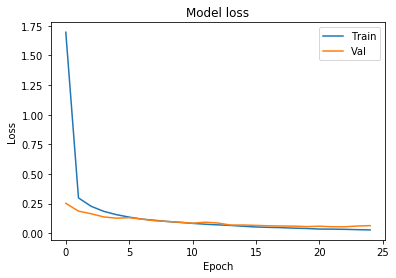

In [0]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

#### Evaluation (5 points)

1. (1 point) Make prediciton of the model on the test set 


In [0]:
prob = model.predict(X_test)

2. (4 points) Compute the confusion matrix and the accuracy. Which classes confused most often?

> The model should have at least 90% accuracy.

**Answer:** The two classes that get confused most often are the 3 and 7 with a total of 22 misclassified samples.

In [0]:
print(sklearn.metrics.confusion_matrix(y_test.argmax(axis=1),prob.argmax(axis=1),labels=[0, 1, 2]))
print('The accuracy of the model is: ',sklearn.metrics.accuracy_score(y_test.argmax(axis=1),prob.argmax(axis=1)))

[[1175    5    2]
 [   4 1042    7]
 [  16   15 1045]]
The accuracy of the model is:  0.985200845665962


#### Bonus point (10 points)

Can you suggest an improvement to the model? Implement it and compare to the one above. How to do robust comparison of the performance?

**Answer:** We could increase the number of feature maps to detect more pattern in the image. To compare the two models, we should train both model multiple times and ensuring that we use the same seed for both model each time and then, compare their overall average performance.

In [0]:
model_bonus = Sequential([
    Conv2D(36, (5, 5), input_shape=(28,28,1)), # convolution
    Activation('relu'), # activation
    MaxPooling2D(pool_size=(2,2)), # pooling
    Conv2D(46, (5, 5)), # convolution
    Activation('relu'), # activation
    MaxPooling2D(pool_size=(2,2)), # pooling
    Flatten(),
    Dense(128), # fully connected
    Activation('relu'), # activation
    Dense(3), # fully connected output
    Activation('softmax'), # softmax
])
model_bonus.summary()




Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 24, 24, 36)        936       
_________________________________________________________________
activation_61 (Activation)   (None, 24, 24, 36)        0         
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 12, 12, 36)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 8, 8, 46)          41446     
_________________________________________________________________
activation_62 (Activation)   (None, 8, 8, 46)          0         
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 4, 4, 46)          0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 736)             

In [0]:
optimizer = optimizers.SGD(lr=0.0005) # create stochastic gradient optimizer
model_bonus.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'],
              )

In [0]:
hist_bonus = model_bonus.fit(x=X_train,y=y_train,epochs=25,validation_data=(X_valid,y_valid))

Train on 16000 samples, validate on 3000 samples
Epoch 1/25
16000/16000 [==============================] - 22s 1ms/step - loss: 5.2462 - acc: 0.6706 - val_loss: 5.2567 - val_acc: 0.6727
Epoch 2/25
16000/16000 [==============================] - 22s 1ms/step - loss: 0.8814 - acc: 0.9356 - val_loss: 0.0716 - val_acc: 0.9897
Epoch 3/25
16000/16000 [==============================] - 22s 1ms/step - loss: 0.0829 - acc: 0.9874 - val_loss: 0.0423 - val_acc: 0.9923
Epoch 4/25
16000/16000 [==============================] - 22s 1ms/step - loss: 0.0452 - acc: 0.9923 - val_loss: 0.0341 - val_acc: 0.9940
Epoch 5/25
16000/16000 [==============================] - 22s 1ms/step - loss: 0.0273 - acc: 0.9949 - val_loss: 0.0224 - val_acc: 0.9943
Epoch 6/25
16000/16000 [==============================] - 22s 1ms/step - loss: 0.0169 - acc: 0.9963 - val_loss: 0.0237 - val_acc: 0.9957
Epoch 7/25
16000/16000 [==============================] - 23s 1ms/step - loss: 0.0127 - acc: 0.9971 - val_loss: 0.0218 - val_acc:

In [0]:
#First model: Accuracy of 98.52%
prob_bonus = model_bonus.predict(X_test)
print('The accuracy of the model is: ',sklearn.metrics.accuracy_score(y_test.argmax(axis=1),prob_bonus.argmax(axis=1)))
#Second model: Accuracy of 99.3%

The accuracy of the model is:  0.9930534581697372


### Graph ML [40 points]

This set of assingments will teach you the differences between various node representations in graphs. Note that all questions are programming assingments but you do not need to use loss function to optimize the claculation of thesee embeddings.  

1- (5 points) Write a function randadjmat(n,p) in Python which returns an adjacency matrix for a "random graph" on n vertices. Here p is the probability of having an edge between any pair of vertices.



In [0]:
import numpy as np
import random

The following function will create an adjacency matrix for a random undirected graph where there is no egdes between a node and itself.

In [0]:
def randadjmat(n,p):
    adjmat = np.zeros((n,n))
    for r in range(n):
      for c in range(r,n):
        prob = random.uniform(0,1)
        if prob<p and c!=r:
          adjmat[r,c]=1
          adjmat[c,r]=1 
    return adjmat

In [0]:
mat = randadjmat(4,.6)
print(mat)

[[0. 0. 0. 1.]
 [0. 0. 1. 1.]
 [0. 1. 0. 1.]
 [1. 1. 1. 0.]]


We can make a different function where we could specify which type of graph we want instead.

In [0]:
def randadjmat2(n,p,type_graph):
    adjmat = np.zeros((n,n))
    if type_graph == 'undirected':
      for r in range(n):
        for c in range(r,n):
          prob = random.uniform(0,1)
          if prob<p:
            adjmat[r,c]=1
            adjmat[c,r]=1
      return adjmat
    if type_graph =='directed':
      for r in range(n):
        for c in range(n):
          prob = random.uniform(0,1)
          if prob<p:
            adjmat[r,c] =1
      return adjmat
    else:
      return "The only acceptable types are 'directed' and 'undirected'."

In [0]:
matdir = randadjmat2(4,.6,'directed')
print(matdir)

[[1. 1. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 1.]
 [1. 1. 0. 0.]]


2- (5 points) Write a function transionmat(A) which, given an adjacency matrix A, generate a transition matrix T where probability of each edge (u,v) is calculated as $1/degree(u)$.


In [0]:
def transionmat(A):
    return A/A.sum(axis=1, keepdims=True)
    

In [0]:
tran = transionmat(mat)
print(tran)

[[0.         0.         0.         1.        ]
 [0.         0.         0.5        0.5       ]
 [0.         0.5        0.         0.5       ]
 [0.33333333 0.33333333 0.33333333 0.        ]]


3- (5 points) Write a function hotembd(A) which, given an adjacency matrix A, generate an embedding matrix H where each node is represetned with a 1-hot vector.

In [0]:
def hotembd(A):
    return np.eye(len(A))

In [0]:
hot = hotembd(matdir)
print(hot)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


4- (5 points) Write a function randwalkemb(A,k) which, given an adjacency matrix A, a transition matrix T, and one-hot encoding H, performs [random walks](https://en.wikipedia.org/wiki/Random_walk) on the graph from each node w times with lenght equal to l and generate an embedding matrix for each node based on the sum of 1-hot encodings of all nodes that are visited during the walks.


In [0]:
def randwalkembd(A,T, H, w, l):
    final_mat = np.zeros(shape=(A.shape))
    cum_prob = np.cumsum(T,axis=1)
    for node in range(len(A)):
      for n_walk in range(w):
        #print('New walk starts')
        current_node = node
        for step in range(l):
          #print('We take the step #',step+1)
          prob = random.uniform(0,1)
          futur_node = np.argwhere(cum_prob[current_node,:]>prob)[0]
          if len(futur_node)>1:
            next_node = futur_node[-1]
          else: 
            next_node=futur_node
          #print(node,current_node,next_node)
          #print(H[next_node])
          final_mat[node] = final_mat[node] + H[next_node]
          #print(final_mat)
          current_node=next_node
    
    return final_mat


    
    

In [0]:
embrand = randwalkembd(mat,tran,hot,2,3)
print(embrand)

[[0. 1. 2. 3.]
 [0. 1. 3. 2.]
 [0. 3. 2. 1.]
 [0. 3. 1. 2.]]


5- (5 points) Write a function hopeneighbormbd(A,H,k) which, given an adjacency matrix A, and one-hot node encoding matrix H, generates node embedding matrix which represents each node as sum of 1-hot encodings of k-hobs neighbors. 


In [0]:
def hopeneighbormbd(A, H, k):
    return np.linalg.matrix_power(A,k)

6- (5 points) Write a function similarnodes(Z) which, given an node embedding matrix, find the most similar nodes in the graph. 

In [0]:
def similarnodes(Z):
    sim = np.dot(np.transpose(Z),Z)
    np.fill_diagonal(sim,0)
    ind = np.unravel_index(np.argmax(sim, axis=None), sim.shape)
    return ind

In [0]:
similarnodes(embrand)

(2, 3)

7- (10 points) generate a random graph where n=20, and p=0.6, and compare the most similar nodes in the graph using randwalkembd (l=4, w=10), hopeneighbormbd (k=1) and hopeneighbormbd (k=2). Justify why similar nodes are different using different node embeddings?

In [0]:
## We generate the adjencency matrix of a random graph using randadjmat:
A = randadjmat(20,.6)

print('The matrix is:', A)

## We can create our transition matrix and our one-hot matrix related to A.
T = transionmat(A)
H = hotembd(A)

print("The random walk embedding:")
embed_walk = randwalkembd(A,T,H,10,4)
print(embed_walk)
print("The 1-hop embedding:")
embed_hop1 = hopeneighbormbd(A, H, 1)
print(embed_hop1)
print("The 2-hop embedding:")
embed_hop2 = hopeneighbormbd(A, H, 2)
print(embed_hop2)

print("The two nodes that are most similar with the random walk embedding are:", similarnodes(embed_walk)[0] , "and", similarnodes(embed_walk)[1],"." )
print("The two nodes that are most similar with the 1-hop embedding are:", similarnodes(embed_hop1)[0], "and",similarnodes(embed_hop1)[1], "."  )
print("The two nodes that are most similar with the 2-hop embedding are:", similarnodes(embed_hop2)[0], "and",similarnodes(embed_hop2)[1], "."  )

The matrix is: [[0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1.]
 [1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1.]
 [0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1.]
 [1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1.]
 [1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1.]
 [1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1.]
 [1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1.]
 [0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1.]
 [1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0.]
 [1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1.]
 [0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1.]
 [1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1.]
 [1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0.]
 [1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1.

**The nodes are different because they do not consider the same characteristic for similarity. Random walk consider two nodes similar if they happen together on a random walk while multi-hop encoding consider the link between the nodes to calculate similarity and in particular, the 1-hop consider only the nodes that are directly connected to each other.**